# Data tests

The four dimensions are x, y, z, and time

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
brain = nib.load('./pet_data/sub-OAS30100/ses-d0158/pet/sub-OAS30100_ses-d0158_acq-PIB_pet.nii.gz')

In [3]:
brain_data = brain.get_fdata()
brain_data.shape

(256, 256, 127, 26)

In [4]:
print(brain.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 256 256 127  26   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       1.40171  1.40171  2.03125  0.       0.       0.       0.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'removed'
aux_file        : b'${NEW_FILENAME_BASE}'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 178.40471
qoffset_y       

15270.73046875

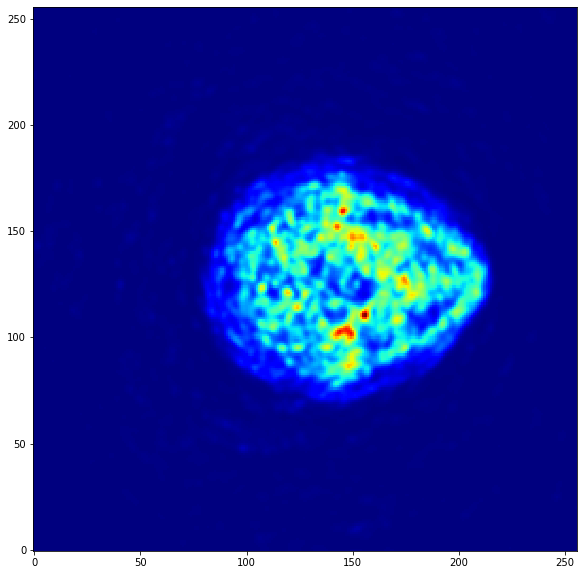

In [5]:

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    axes.imshow(slices[0], cmap="jet", origin="lower")
slices = []

slices.append(brain_data[:, :, 8, 20])

show_slices(slices)
np.amax(slices)

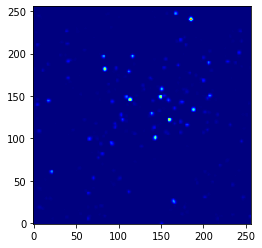

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(brain_data.shape[2]):
    im = plt.imshow(brain_data[:, :, i, 20], cmap="jet", origin="lower", animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('pet_demo.mp4')